# CS5242

## Load Data

In [1]:
from data import Data
import numpy as np

full_train = Data(data_type='train')

# idx = np.random.permutation(len(full_train.x))
# full_train_x,full_train_y = full_train.x[idx], full_train.y[idx]
full_train_x,full_train_y = full_train.x, full_train.y


del full_train

val_data_x, train_data_x = full_train_x[:full_train_x.shape[0]//5,:], full_train_x[full_train_x.shape[0]//5:,:]
val_data_y,train_data_y = full_train_y[:full_train_y.shape[0]//5,:], full_train_y[full_train_y.shape[0]//5:,:]

print("Train data: x:"+ str(train_data_x.shape)+ ' y:'+str(train_data_y.shape))
print("Validation data: x:"+ str(val_data_x.shape)+ ' y:'+str(val_data_y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(14930, 1000, 102) y:(14930, 1)
Validation data: x:(3732, 1000, 102) y:(3732, 1)


## Model

In [2]:
import tensorflow as tf
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

model_name = 'boosting_lstm_pooling_2'

def create_model(show_summary = False):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True),input_shape=(1000,102)),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(1e-4,0.95,0.99),
                  metrics=['accuracy',tf.keras.metrics.AUC()])
    
    if show_summary:
        model.summary()
    
    return model
    
num_of_bags = 10
epochs_per_bag = 250
start_from_bag = 0


## Training with Boosting

Training bag 0
[1. 1. 1. ... 1. 1. 1.]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1000, 256)         236544    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 302,593
Trainable params: 302,593
Non-trainable params: 0
_________________________________________________________________
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 22s

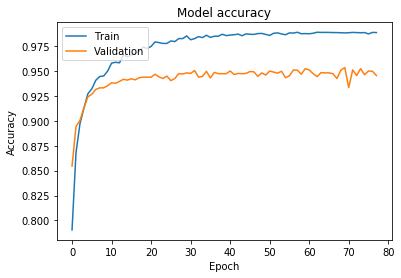

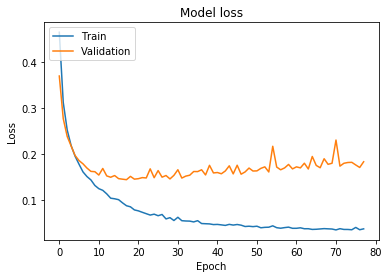

Training bag 1
(14930, 1)
(14930,)
[0.00068545 0.00136006 0.01093405 ... 0.06521353 0.02887827 0.31755871]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 1)
(6051,)
Saved to result_boosting_lstm_pooling_2_boost1.csv
[0.9985463  0.99802628 0.99779043 ... 0.00718251 0.00715488 0.00715029]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 20s - loss: 0.6363 - accuracy: 0.6266 - auc_3: 0.6787 - val_loss: 0.5075 - val_accuracy: 0.8499 - val_auc_3: 0.8995
Epoch 2/250
5972/5972 - 18s - loss: 0.5757 - accuracy: 0.7045 - auc_3: 0.7722 - val_loss: 0.4611 - val_accuracy: 0.8872 - val_auc_3: 0.9432
Epoch 3/250
5972/5972 - 18s - loss: 0.5133 - accuracy: 0.7647 - auc_3: 0.8392 - val_loss: 0.3725 - val_accuracy: 0.9118 - val_auc_3: 0.9564
Epoch 4/250
5972/5972 - 18s - loss: 0.4641 - accuracy: 0.8123 - auc_3: 0.8736 - val_loss: 0.3156 - val_accuracy: 0.9236 - val_auc_3: 0.9623
Epoch 5/250
5972/5972 - 18s - loss: 0.4208 - accuracy: 0.8290 - auc_3: 0.8958 - val_loss: 0.2964 - val_accuracy: 0.9325 - val_auc_3: 0.9669
Epoch 6/250
5972/5972 - 18s - loss: 0.3844 - accuracy: 0.8483 - auc_3: 0.9113 - val_loss: 0.2538 - val_accuracy

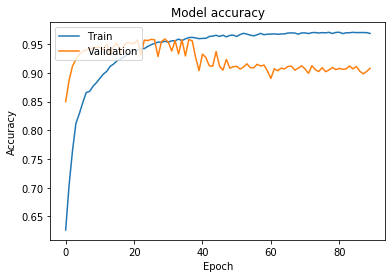

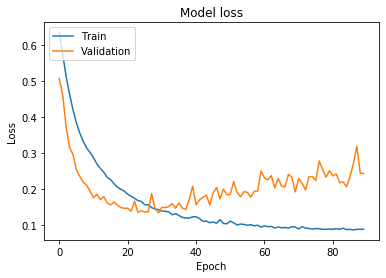

Training bag 2
(14930, 2)
(14930,)
[0.00051969 0.08463353 0.00767392 ... 0.07039171 0.01981854 0.1613394 ]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 2)
(6051,)
Saved to result_boosting_lstm_pooling_2_boost2.csv
[0.99268879 0.98288244 0.97187763 ... 0.02138019 0.02137992 0.02136709]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 22s - loss: 0.4974 - accuracy: 0.7430 - auc_5: 0.7821 - val_loss: 0.6145 - val_accuracy: 0.5587 - val_auc_5: 0.8070
Epoch 2/250
5972/5972 - 18s - loss: 0.4257 - accuracy: 0.7830 - auc_5: 0.8500 - val_loss: 0.5730 - val_accuracy: 0.6206 - val_auc_5: 0.8594
Epoch 3/250
5972/5972 - 18s - loss: 0.4021 - accuracy: 0.7991 - auc_5: 0.8687 - val_loss: 0.5341 - val_accuracy: 0.7170 - val_auc_5: 0.9012
Epoch 4/250
5972/5972 - 18s - loss: 0.3816 - accuracy: 0.8116 - auc_5: 0.8835 - val_loss: 0.4890 - val_accuracy: 0.7658 - val_auc_5: 0.9182
Epoch 5/250


In [ ]:
import os
import matplotlib.pyplot as plt
import csv
import math
from data import Data

%matplotlib inline
    
training_loss = np.ones(train_data_x.shape[0])

for bag in range(num_of_bags):
    # skip training
    if bag < start_from_bag:
        print("skiping bag "+str(bag))
        continue
    print("Training bag "+str(bag))

    # Put data into bags
    model = create_model(False)
    train_size = train_data_x.shape[0]//10*4
    if bag != 0 :
        # Check prediction for training data
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(train_data_x)
            else:
                predictions = np.concatenate((predictions,model.predict(train_data_x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        # Select training data poorly predicted 
        training_loss = avg_predictions-np.reshape(train_data_y,(train_data_y.shape[0]))
        training_loss = np.absolute(training_loss)
        print(training_loss)
        
        # Save Predictions for test data
        test_data = Data(data_type='test')
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(test_data.x)
            else:
                predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        output_file = 'result_' + model_name +'_boost'+ str(bag) +'.csv'
        with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
            csv_writer = csv.writer(output_file)
            csv_writer.writerow(('Id', 'Predicted'))
            for id, predict in enumerate(avg_predictions):
                csv_writer.writerow((id, predict))
        print('Saved to '+'result_' + model_name +'_boost'+ str(bag) +'.csv')
        # Free memory space for test data
        del test_data
        
        
    
    idx = (-training_loss).argsort()[:train_size]
    print(training_loss[idx])
    bag_x,bag_y = train_data_x[idx], train_data_y[idx]
        
    del model
        
    ## TODO define different models if possible
    model = create_model(bag==0)
    # Directory where the checkpoints will be saved
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True)

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0, 
        patience=60, 
        mode='auto', 
        restore_best_weights=True)
        
        
        
    history = model.fit(x=bag_x,y=bag_y, validation_data=(val_data_x,val_data_y), epochs=epochs_per_bag,batch_size=32,
                    callbacks=[checkpoint_callback,early_stopping_callback], verbose=2,shuffle=True)
    
    print()
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    del model,history,bag_x,bag_y
    

## Restore Weights

In [ ]:
checkpoint_dir = './checkpoints/' + model_name
model = create_model()

import numpy as np
from data import Data

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))

for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
print(predictions.shape)

avg_predictions = np.mean(predictions, axis=1)
print(avg_predictions.shape)



## Save Prediction to CSV

In [ ]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(avg_predictions):
        csv_writer.writerow((id, predict))
print('Saved to '+'result_' + model_name + '.csv')